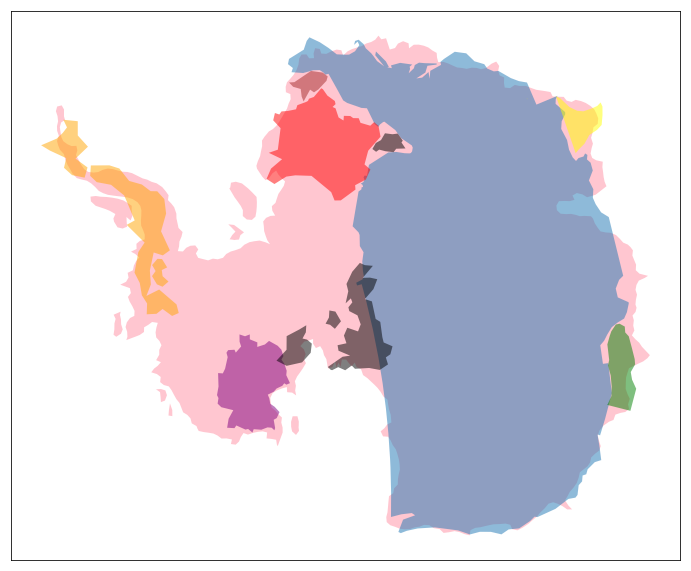

In [74]:
import os
import pandas
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import shapely

def moveit(gdf, angle = 0, xoffset = 0, yoffset = 0):
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.rotate(x, angle))
    gdf.geometry = gdf.geometry.apply(lambda x: shapely.affinity.translate(x, xoff=xoffset, yoff=yoffset))
    
    return gdf

def makeboxfilter(gdf, left, right, top, bottom):
    swcorner = (left, bottom)
    nwcorner = (left, top)
    necorner = (right, top)
    secorner = (right, bottom)
    pointlist = [swcorner, nwcorner, necorner, secorner, swcorner]
    pgon = shapely.geometry.Polygon([[p[0], p[1]] for p in pointlist])
    bbox = pgon.envelope
    bbdf = gpd.GeoDataFrame(gpd.GeoSeries(bbox), columns=['geometry'])
    bbdf = bbdf.set_geometry('geometry')
    
    return bbdf

datadir = '/home/idies/workspace/raddick_census/pop2016'
os.chdir(datadir)

statedir = '/home/idies/workspace/raddick_census/geography/STATE/'
statefile = statedir + 'tl_2016_us_state.shp'
states_geo = gpd.read_file(statefile)
warnings.filterwarnings("ignore")
#import matplotlib.patches as mpatches

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.set_index('iso_a3')

antarctica = world[world['name'] == 'Antarctica']
usa = world[world.index == 'USA']
tx = world[world.index == 'USA']
fl = world[world.index == 'USA']

antarctica = projectit(antarctica, 'aea', lat0=-90, lat1=-82, lat2=-82, lon0=0.001)

bbdf = makeboxfilter(usa, left=-130, right=-60, top=50, bottom=29)
usa = gpd.overlay(usa, bbdf, how='intersection')

flbbdf = makeboxfilter(fl, left=-83.5, right=-79, top=31.5, bottom=25)
usa = gpd.overlay(usa, flbbdf, how='difference')
fl = gpd.overlay(fl, flbbdf, how='intersection')

txbbdf = makeboxfilter(fl, left=-105, right=-92, top=29, bottom=25)
usa = gpd.overlay(usa, txbbdf, how='difference')
tx = gpd.overlay(tx, txbbdf, how='intersection')

jp = world[world.index == 'JPN']

fr = world[world.index == 'FRA']
corsica = world[world.index == 'FRA']

it = world[world.index == 'ITA']
sicily = world[world.index == 'ITA']
sardinia = world[world.index == 'ITA']

frbbdf = makeboxfilter(fr, left=-6, right=8, top=52, bottom=42)
fr = gpd.overlay(fr, frbbdf, how='intersection')

corbbdf = makeboxfilter(corsica, left=8, right=13, top=45, bottom=40)
corsica = gpd.overlay(corsica, corbbdf, how='intersection')

nl = world[world.index == 'NLD']
nlbbdf = makeboxfilter(nl, left=3, right=8, top=54, bottom=50)
nl = gpd.overlay(nl, nlbbdf, how='intersection')

de = world[world.index == 'DEU']
be = world[world.index == 'BEL']

gb = world[world.index == 'GBR']
ni = world[world.index == 'GBR']
ei = world[world.index == 'IRL']

gbbbdf = makeboxfilter(fr, left=-9, right=2, top=60, bottom=50)
gb = gpd.overlay(gb, gbbbdf, how='intersection')

itbbdf = makeboxfilter(it, left=6, right=20, top=48, bottom=36)
it = gpd.overlay(it, itbbdf, how='intersection')

#sicilybbdf = makeboxfilter(it, left=6, right=20, top=48, bottom=36)
#it = gpd.overlay(sicily, sicilybbdf, how='difference')
#sicily = gpd.overlay(sicily, sicilybbdf, how='intersection')

for x in [usa, fl, tx, jp, fr, nl, be, de, gb, ei]:
    x.crs = {'init':'epsg:4326'}

usa = usa.to_crs('+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
fl = fl.to_crs('+proj=aea +lat_1=24 +lat_2=31.5 +lat_0=24 +lon_0=-84 +x_0=400000 +y_0=0 +ellps=GRS80 +units=m +no_defs')
tx = tx.to_crs('+proj=aea +lat_1=27.5 +lat_2=35 +lat_0=18 +lon_0=-100 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
jp = jp.to_crs('+proj=aea +lat_1=31.3333 +lat_2=44.8333 +lat_0=36 +lon_0=137 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
fr = fr.to_crs('+proj=aea +lat_1=43.3333 +lat_2=50.8333 +lat_0=47 +lon_0=1 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
nl = nl.to_crs('+proj=aea +lat_1=50.53 +lat_2=54.5 +lat_0=52.5 +lon_0=5.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
be = be.to_crs('+proj=aea +lat_1=50 +lat_2=51 +lat_0=50.5 +lon_0=4.6 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
de = de.to_crs('+proj=aea +lat_1=48.8333 +lat_2=52.3333 +lat_0=51 +lon_0=4.6 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')

gb = gb.to_crs('+proj=aea +lat_1=49.1111 +lat_2=60.9999 +lat_0=55 +lon_0=-6.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
ei = ei.to_crs('+proj=aea +lat_1=49.1111 +lat_2=60.9999 +lat_0=55 +lon_0=-6.5 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')



#it = projectit(it, lat0=42, lat1=36, lat2=48, lon0=13.5)


usa = moveit(usa, angle=105, xoffset=1175000, yoffset=-165000)
fl = moveit(fl, angle=165, xoffset=1800000, yoffset=-1200000)
tx = moveit(tx, angle=108, xoffset=1900000, yoffset=400000)
jp = moveit(jp, angle=71, xoffset=-2000000, yoffset=300000)
fr = moveit(fr, angle=56, xoffset=-280000, yoffset=1200000)
nl = moveit(nl, angle=-35, xoffset=-300000, yoffset=1790000)
be = moveit(be, angle=40, xoffset=410000, yoffset=1200000)
de = moveit(de, angle=-5, xoffset=-1200000, yoffset=-900000)

#corsica = moveit(corsica, angle=-20, xoffset=-220000, yoffset=1690000)
#
#

fig, ax = plt.subplots(figsize=(12,12))
ax.set_aspect('equal')

plt.tick_params(axis='both', which='both', left='off', bottom='off', labelleft='off', labelbottom='off') # labels along the bottom edge are off

antarctica.plot(ax=ax, alpha=0.9, color='pink')
usa.plot(ax=ax, alpha=0.5)
fl.plot(ax=ax, alpha=0.5, color='green')
tx.plot(ax=ax, alpha=0.5, color='yellow')
jp.plot(ax=ax, alpha=0.5, color='orange')
fr.plot(ax=ax, alpha=0.5, color='red')
nl.plot(ax=ax, alpha=0.5, color='brown')
be.plot(ax=ax, alpha=0.5, color='black')
de.plot(ax=ax, alpha=0.5, color='purple')

#it = moveit(it, angle=-50, xoffset=-100000, yoffset=800000)
#it.plot(ax=ax, alpha=0.5, color='green')
gb = moveit(gb, angle=-15, xoffset=-80000, yoffset=-260000)
gb.plot(ax=ax, alpha=0.5, color='black')

ei = moveit(ei, angle=-15, xoffset=-310000, yoffset=-360000)
ei.plot(ax=ax, alpha=0.5, color='black')

plt.show()
#world[world['name'] == 'Ireland']